# **Question 1 : Data Preprocessing**

**1.0 Load data**

In [8]:
import urllib.request
import pandas as pd
from pathlib import Path

def loadData():
  urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1VgJD484t_hEo2n4aAbtWGPvKpsNdYF7Z", "cars_data.csv")
  raw_data = pd.read_csv("cars_data.csv")
  return raw_data

cars_data = loadData()
# Get raw data present in dataset
print(cars_data)

   Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0         Acura  Integra    Small       12.9   15.9       18.8        25   
1         Acura   Legend  Midsize       29.2   33.9       38.7        18   
2          Audi       90  Compact       25.9   29.1       32.3        20   
3          Audi      100  Midsize       30.8   37.7       44.6        19   
4           BMW     535i  Midsize       23.7   30.0       36.2        22   
..          ...      ...      ...        ...    ...        ...       ...   
88   Volkswagen  Eurovan      Van       16.6   19.7       22.7        17   
89   Volkswagen   Passat  Compact       17.6   20.0       22.4        21   
90   Volkswagen  Corrado   Sporty       22.9   23.3       23.7        18   
91        Volvo      240  Compact       21.8   22.7       23.5        21   
92        Volvo      850  Midsize       24.8   26.7       28.5        20   

    MPG.highway             AirBags DriveTrain  ... Fuel.tank.capacity  \
0            

**1.1 Classifications**

Model: Nomimal

Type: Nominal

Max.Ratio : Ratio

Airbags : Ordinal

**1.2 Handling Missing values**

In [9]:
cars_data.describe()

Min.Price      Price  Max.Price   MPG.city  MPG.highway  EngineSize  \
count  93.000000  93.000000  93.000000  93.000000    93.000000   93.000000   
mean   17.125806  19.509677  21.898925  22.365591    29.086022    2.667742   
std     8.746029   9.659430  11.030457   5.619812     5.331726    1.037363   
min     6.700000   7.400000   7.900000  15.000000    20.000000    1.000000   
25%    10.800000  12.200000  14.700000  18.000000    26.000000    1.800000   
50%    14.700000  17.700000  19.600000  21.000000    28.000000    2.400000   
75%    20.300000  23.300000  25.300000  25.000000    31.000000    3.300000   
max    45.400000  61.900000  80.000000  46.000000    50.000000    5.700000   

       Horsepower          RPM  Rev.per.mile  Fuel.tank.capacity  Passengers  \
count   93.000000    93.000000     93.000000           93.000000   93.000000   
mean   143.827957  5280.645161   2332.204301           16.664516    5.086022   
std     52.374410   596.731690    496.506525            3.279370    1.038979   
min     55.000000  3800.000000   1320.000000            9.200000    2.000000   
25%    103.000000  4800.000000   1985.000000           14.500000    4.000000   
50%    140.000000  5200.000000   2340.000000           16.400000    5.000000   
75%    170.000000  5750.000000   2565.000000           18.800000    6.000000   
max    300.000000  6500.000000   3755.000000           27.000000    8.000000   

           Length   Wheelbase      Width  Turn.circle  Rear.seat.room  \
count   93.000000   93.000000  93.000000    93.000000       91.000000   
mean   183.204301  103.946237  69.376344    38.956989       27.829670   
std     14.602382    6.819674   3.778986     3.223265        2.989072   
min    141.000000   90.000000  60.000000    32.000000       19.000000   
25%    174.000000   98.000000  67.000000    37.000000       26.000000   
50%    183.000000  103.000000  69.000000    39.000000       27.500000   
75%    192.000000  110.000000  72.000000    41.000000       30.000000   
max    219.000000  119.000000  78.000000    45.000000       36.000000   

       Luggage.room       Weight  
count     82.000000    93.000000  
mean      13.890244  3072.903226  
std        2.997967   589.896510  
min        6.000000  1695.000000  
25%       12.000000  2620.000000  
50%       14.000000  3040.000000  
75%       15.000000  3525.000000  
max       22.000000  4105.000000

In [10]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

As per data there are 25 column i.e. 25 different parameters about each car are given. most of the parameters have 93 non null entries but some parameters such as AirBags, rear.seat.room, Luggage.room, etc contains some null entries. Before feeding data to ML model first it is required to remove null entries which is known as Imputation.

In [11]:
# Imputation with custom function
def simple_imputation(strategy, raw_data, column_list, old_value = "Unknown", value = "Unknown"):
  data = raw_data.copy()
  for column in column_list:
    if strategy == "mean":
      mean = data[column].mean(numeric_only = True)
      data[column] = data[column].fillna(mean)
    elif strategy == "median":
      med = data[column].median(numeric_only = True)
      data[column] = data[column].fillna(med)
    elif strategy == "most_frequent":
      if not data.mode().empty:
          mode_values = data[column].mode().iloc[0]
          data[column] = data[column].fillna(mode_values)
    elif strategy == "custom":
      data[column] = data[column].replace(old_value,value)

  return data


cars_data = simple_imputation("mean", cars_data, ["Rear.seat.room", "Luggage.room"])
cars_data = simple_imputation("most_frequent", cars_data, ["AirBags"])
cars_data.info()

#
# Imputation using sikit learn library
#

# import numpy as np
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy = "mean")
# cars_data[["Rear.seat.room", "Luggage.room"]] = imputer.fit_transform(cars_data[["Rear.seat.room", "Luggage.room"]])

# imputer = SimpleImputer(strategy = "most_frequent")
# cars_data[["AirBags"]] = imputer.fit_transform(cars_data[["AirBags"]])
# cars_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

**1.3 Noise Reduction**

After handling unknown values. Outliers cause the errors in ML model. To detect outliers visually, cars data histogram is plotted.

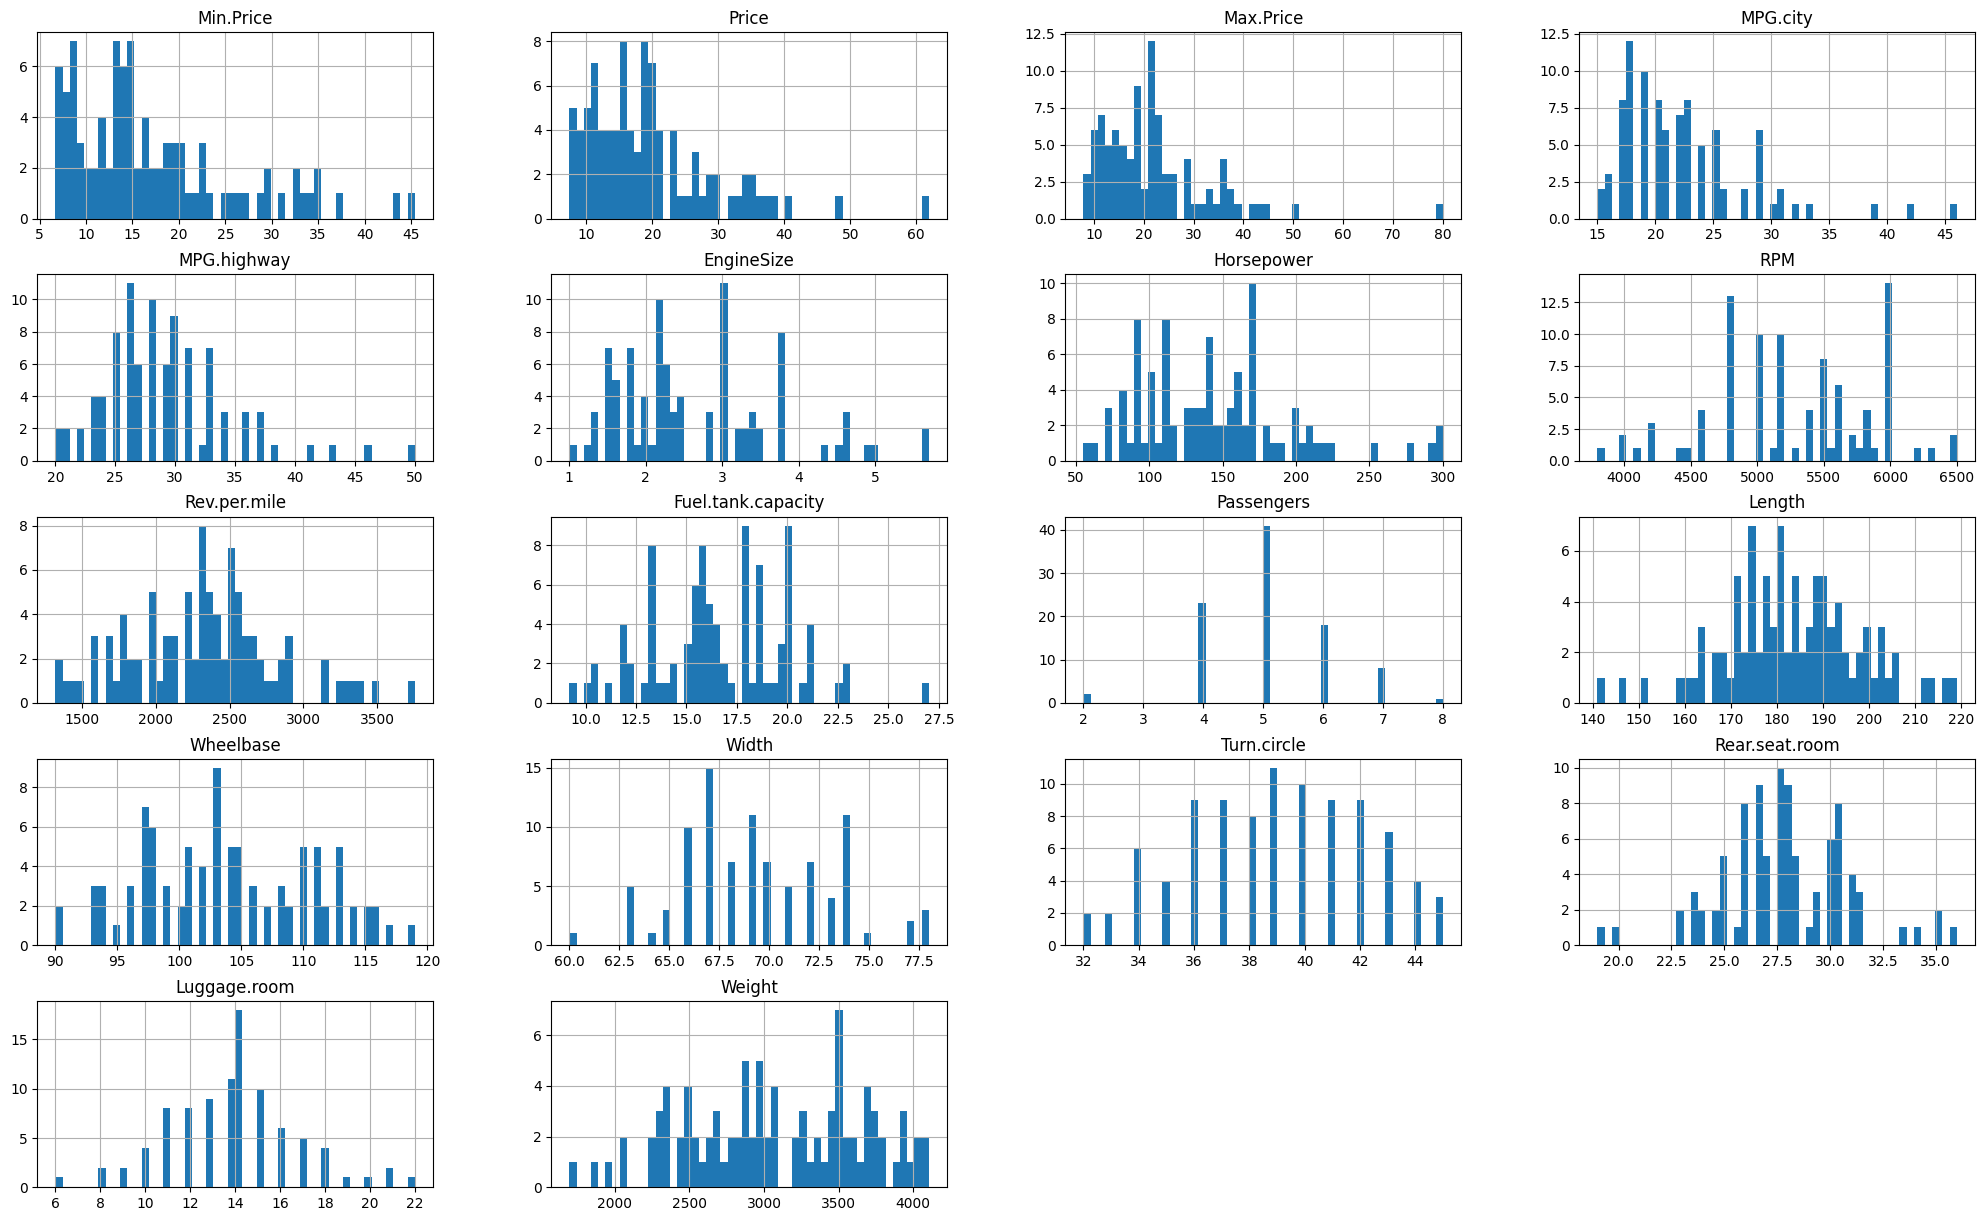

In [12]:
import matplotlib.pyplot as plt

cars_data.hist(bins = 50, figsize = (25, 15))
plt.show()



From above it is clear that attributes like "Min.Price","Price","Max.Price", "MPG.city", "MPG.highway","EngineSize","Horsepower","Fuel.tank.capacity" contains the outliers.

To detect outliers from cars data, interquartile method is used because the data is smaller in size.

Cars data after removal of noise shown as histogram below


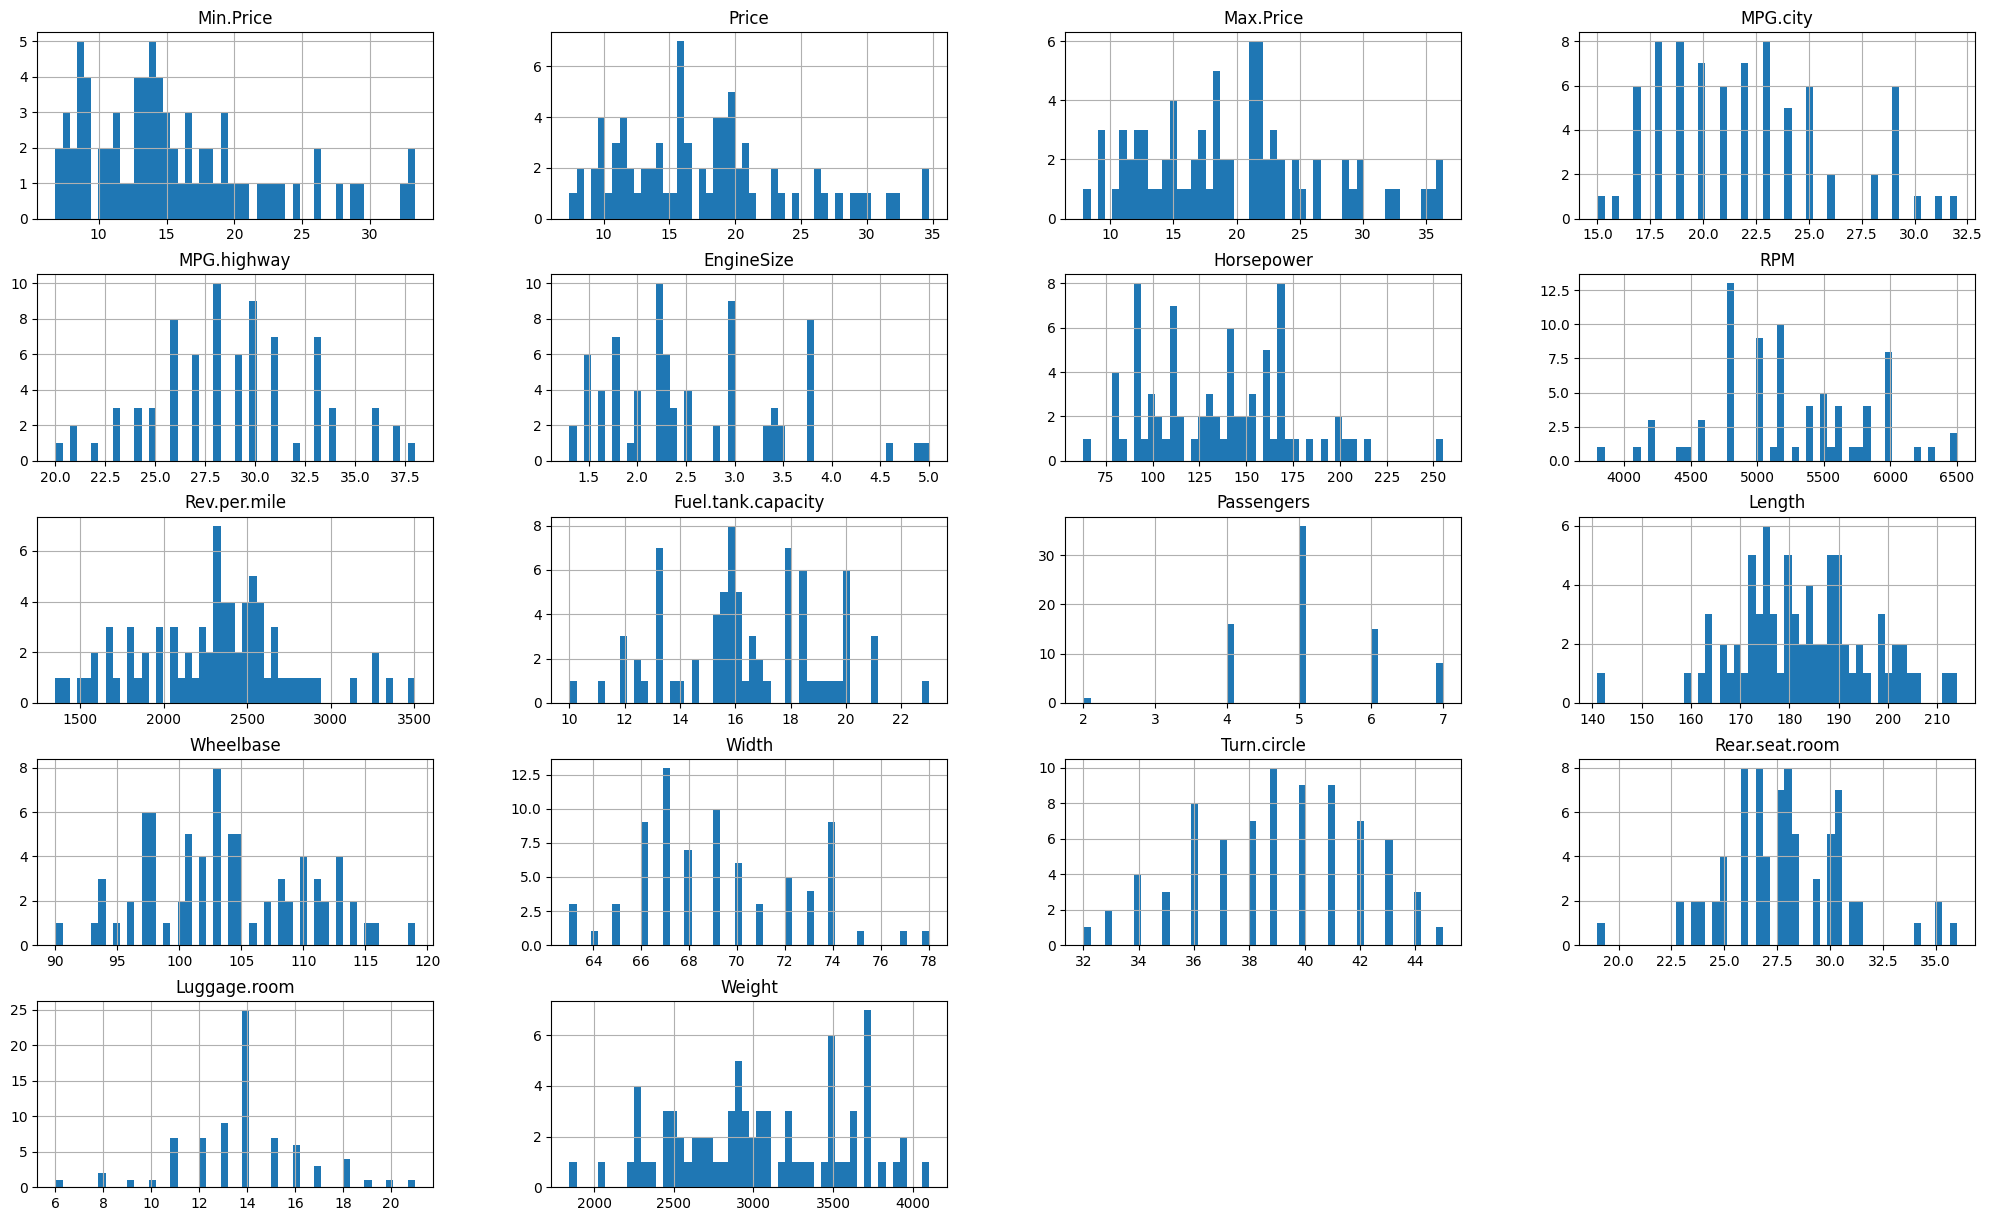

In [14]:
import numpy as np
def IQR_outlier_detection(data, attribute):
  Q1 = np.percentile(data[attribute], 25, method = 'midpoint')
  Q2 = np.percentile(data[attribute], 75, method = 'midpoint')

  IQR = Q2 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q2 + 1.5 * IQR

  outliers = data[(data[attribute] < lower_bound) | (data[attribute] > upper_bound)]
  return outliers

def Remove_Outliers(data, attributes):
  for attribute in attributes:
    outliers = IQR_outlier_detection(data, attribute)
    data.drop(outliers.index, inplace = True)

Remove_Outliers(cars_data, ["Min.Price","Price","Max.Price", "MPG.city", "MPG.highway","EngineSize","Horsepower","Fuel.tank.capacity"])

cars_data.hist(bins=50, figsize=(25, 15))
plt.show()

**1.4 Encoding**

The cars data contain attributes such as Manufacturer, Model, Type, AirBags, DriveTrain, etc. as non numeric objects. But machine learning model work best on numerical data hence it is required to convert text to number. The process which convert text to number is known as encoding

In [15]:
from sklearn.preprocessing import OrdinalEncoder

def encoding_data(data, column_list):
  for column in column_list:
    ord1 = OrdinalEncoder()
    ord1.fit(data[[column]])
    data[column] = ord1.transform(data[[column]])
  return data

cars_data = encoding_data(cars_data,['Manufacturer','Model','Type','AirBags','DriveTrain','Origin'])

**1.5 Normalizing and Scaling**

In this data is transform into standard scale, normally 0 to 1. This ensure that no single feature dominates the others due to its magnitude.

Below Z-Score technique is used to normalize the data because it is less sensitive to outliers.

In [16]:
from sklearn.preprocessing import StandardScaler
def zscrore_normalization(data, column_list = None):
  scaler = StandardScaler()

  # if no attribute list is provided the fetch the attribute list first and then apply normalization
  if column_list is None:
    column_list = data.select_dtypes(include=['number']).columns.tolist()

  data[column_list] = scaler.fit_transform(data[column_list])
  return data

cars_data = zscrore_normalization(cars_data)
print(cars_data)

    Manufacturer     Model      Type  Min.Price     Price  Max.Price  \
0      -1.840224  0.205129  0.417039  -0.422118 -0.270882  -0.129506   
2      -1.714340 -1.435903 -1.447372   1.583909  1.758611   1.836068   
4      -1.588456 -1.572656 -0.204431   1.244427  1.896985   2.403900   
5      -1.462572 -0.843308 -0.204431  -0.221516 -0.301632  -0.347903   
6      -1.462572  0.341882 -0.825901   0.658050  0.482490   0.292729   
..           ...       ...       ...        ...       ...        ...   
88      1.558641 -0.113961  1.659980   0.148828  0.313366   0.438327   
89      1.558641  0.752140 -1.447372   0.303137  0.359491   0.394647   
90      1.558641 -0.660971  1.038510   1.120979  0.866864   0.583925   
91      1.684525 -1.663824 -1.447372   0.951239  0.774614   0.554805   
92      1.684525 -1.481487 -0.204431   1.414168  1.389612   1.282795   

    MPG.city  MPG.highway   AirBags  DriveTrain  ... Fuel.tank.capacity  \
0   0.737106     0.533571  0.389249   -0.083754  ...        

**1.6 Split Data into Train, Validation & Test Set**

In ML model training it is neccessary to split data into train, test and validation set.

train set is used to train the model. So model can recoginze the patterns present in data set.

validation set is used to fine tune model.

test set is used to analyze the model if it is working properly with set of data which is unkown to it.

In [17]:
def split_data(data, test_size=20, validation_size=0):
    shuffled_data = data.copy()
    shuffled_data = shuffled_data.iloc[np.random.permutation(len(shuffled_data))].reset_index(drop=True)

    total_length = shuffled_data.shape[0]

    train_index = int(total_length * ((100 - test_size - validation_size) / 100))
    validation_index = train_index + int(total_length * (validation_size / 100))

    train_set = shuffled_data[:train_index]
    validation_set = shuffled_data[train_index:validation_index]
    test_set = shuffled_data[validation_index:]

    return train_set, validation_set, test_set

train_set, validation_set, test_set = split_data(cars_data, 20, 10)
print(train_set.shape[0], validation_set.shape[0], test_set.shape[0])

53 7 16


# **Question 2a: Linear Regression**

**2a.0 Extract Data & Preprocessing**

In [18]:
import urllib.request
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

def loadData():
  urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1ZkVQnHsMKLPVnsdk6L26yiK4Ds3a4TT3", "linear_reg_data.csv")
  raw_data = pd.read_csv("linear_reg_data.csv")
  return raw_data

raw_data = loadData()
raw_data.info()
raw_data.describe()


# Split data into train and test data set
height_train, height_test, weight_train, weight_test = train_test_split(raw_data["Height "], raw_data["Weight"], test_size=0.2, random_state=25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Height   15 non-null     float64
 1   Weight   15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


**2.a.1 Linear Regration With Scikit Learn Model**

In this section, the linear regression model provided by scikit learn library is used.

Linear Regression model is selected with LinearRegression() Model is trained on height and weight data sets Prediction is made over trained model

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(pd.DataFrame(height_train), weight_train) # fit require 2d list as parameter hence train data which is 1D list conveted into 2D list using pandas

prediction = model.predict(pd.DataFrame(height_test))

**2.a.2 Coefficient & Graph**

In [20]:
print(f"Coefficient is {model.coef_[0]}")

Coefficient is 61.88137899750509


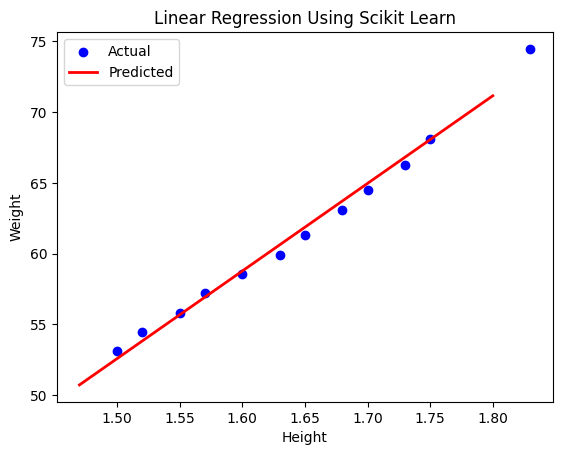

In [21]:
import matplotlib.pyplot as plt

plt.scatter(height_train, weight_train, color='blue', label='Actual')
plt.plot(height_test, prediction, color='red', linewidth=2, label='Predicted')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.title("Linear Regression Using Scikit Learn")
plt.show()

**2.a.3 Linear Regression without Scikit Learn**


a. Linear regression equation is

y=b0​+b1​x

The optimal solution for linear regression can be find out by gradient decent method as below


b. Cost function for linear regression is

J(b0, b1) = (1/n)(sum((yi - y)^2)) : where 0 < i < n

c. Reduce cost function to get b0 and b1. i.e. Find out gradient and equate to 0 to get function parameters

gradient J(b0, b1) = [

                -(2/n)(sum((yi - y)^2)) : where 0 < i < n
                -(2/n)(sum((yi - y)^2)(xi)) : where 0 < i < n
]

hence

b0(new) = b0 - alpha * ( -(2/n)(sum((yi - y)^2)))

b1(new) = b1 - alpha * (-(2/n)(sum((yi - y)^2(xi))))

  where alpha is learning rate. it is the hyperparameter

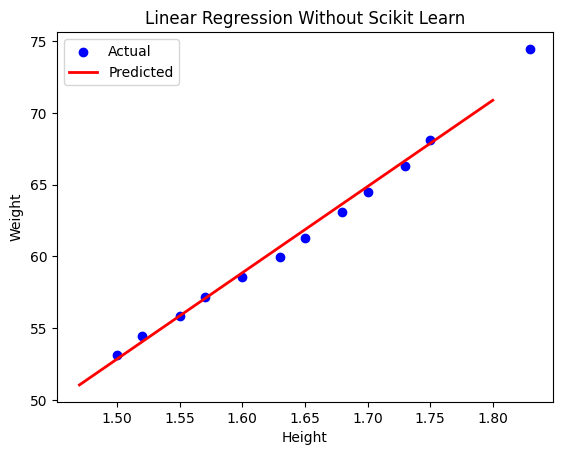

In [22]:
import numpy as np

def LinearRegressionWithGD(x,y):
  alpha = 0.1 # 0.01, 0.001, 0.005, ... is ineffective with low number of iterations
  iterations = 6000

  b0 = 0
  b1 = 0
  n = len(x)
  for i in range(iterations):
    pred_y = b0 + (b1*x)

    grad_b0 = -(2/n) * np.sum(y-pred_y)
    grad_b1 = -(2/n) * np.sum((y-pred_y)*x)

    b0 = b0 - alpha * grad_b0
    b1 = b1 - alpha * grad_b1

  return b0, b1

intercept, slop = LinearRegressionWithGD(height_train, weight_train)

# Plot the model
plt.scatter(height_train, weight_train, color='blue', label='Actual')
plt.plot(height_test, intercept + slop*height_test, color='red', linewidth=2, label='Predicted')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.title("Linear Regression Without Scikit Learn")
plt.show()

**2.a.4 Comparision**

*   Both models produced similar results with comparable slopes.
*   The manually trained model showed a slightly better fit compared to the scikit-learn model, though both produced similar overall performance.
*   In manual training of the model, it requires more time to find optimized hyperparameters than training model with Scikit learn.







# **Question 2.b Logistic Regression**

**2.b.0 Extract Data & Data Preprocessing**

In [23]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Import data from csv and convert it into panda frame
def loadData():
  urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1YY8yYClciSKXdXqyglz-h6AhXeUZcpPN", "logisitic_reg_data.csv")
  raw_data = pd.read_csv("logisitic_reg_data.csv")
  return raw_data

raw_data = loadData()
raw_data.info()
raw_data.describe()

# encoding : replace gender with some code
ordinal_encoder = OrdinalEncoder()
raw_data["Gender"] = ordinal_encoder.fit_transform(raw_data[["Gender"]]).astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**2.b.1 Spliting data into train & test set**

In [25]:
# Split data into 70:30, train and test data set
train_set, test_set = train_test_split(raw_data, test_size=0.3, random_state=25)

print(train_set.info(), test_set.info())

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 293 to 132
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          280 non-null    int64
 1   Gender           280 non-null    int64
 2   Age              280 non-null    int64
 3   EstimatedSalary  280 non-null    int64
 4   Purchased        280 non-null    int64
dtypes: int64(5)
memory usage: 13.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 121 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          120 non-null    int64
 1   Gender           120 non-null    int64
 2   Age              120 non-null    int64
 3   EstimatedSalary  120 non-null    int64
 4   Purchased        120 non-null    int64
dtypes: int64(5)
memory usage: 5.6 KB
None None


**2.b.2 Train logistic regression model**

Logistic regression model is train against the target "Purchased" because it is the binary column and it is perfect for lebelling

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_set.drop("Purchased", axis=1), train_set["Purchased"]) # Purchased column droped from main panda frame and used as target label to train model

LogisticRegression()

**2.b.3 Confusion Matrix & Accuracy**

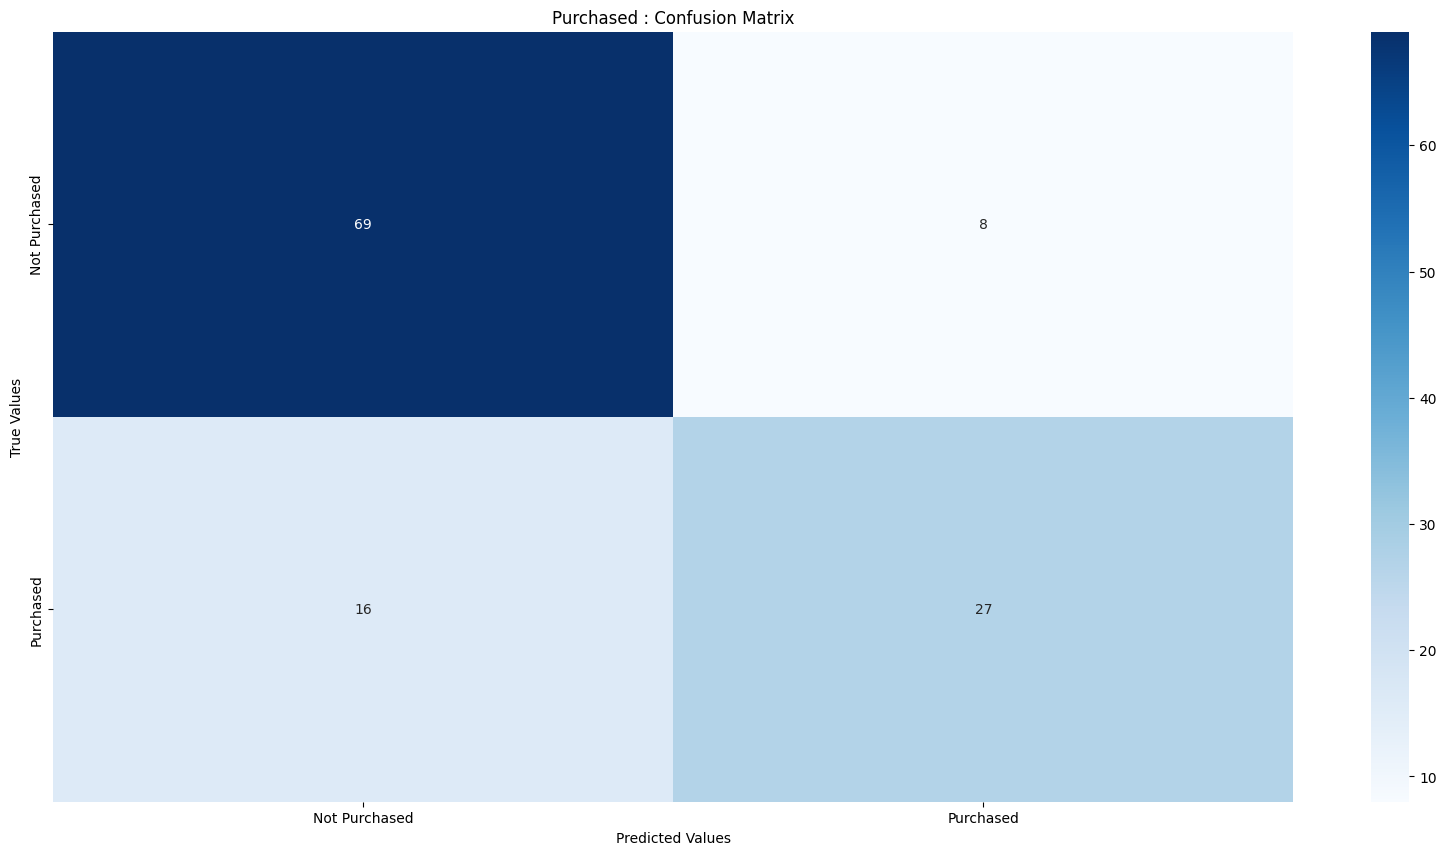

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

predictions = model.predict(test_set.drop("Purchased", axis=1))
cm_matrix = confusion_matrix(test_set["Purchased"], predictions)

plt.figure(figsize = (20,10))
sns.heatmap(cm_matrix, annot=True, fmt='.0f', cmap='Blues', xticklabels=["Not Purchased", "Purchased"], yticklabels=["Not Purchased", "Purchased"])

plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Purchased : Confusion Matrix")
plt.show()

In [35]:
# Accuracy
accuracy = model.score(test_set.drop("Purchased", axis=1), test_set["Purchased"])
print(f"Accuracy: {accuracy}")

Accuracy: 0.8


**Decision Boundry**

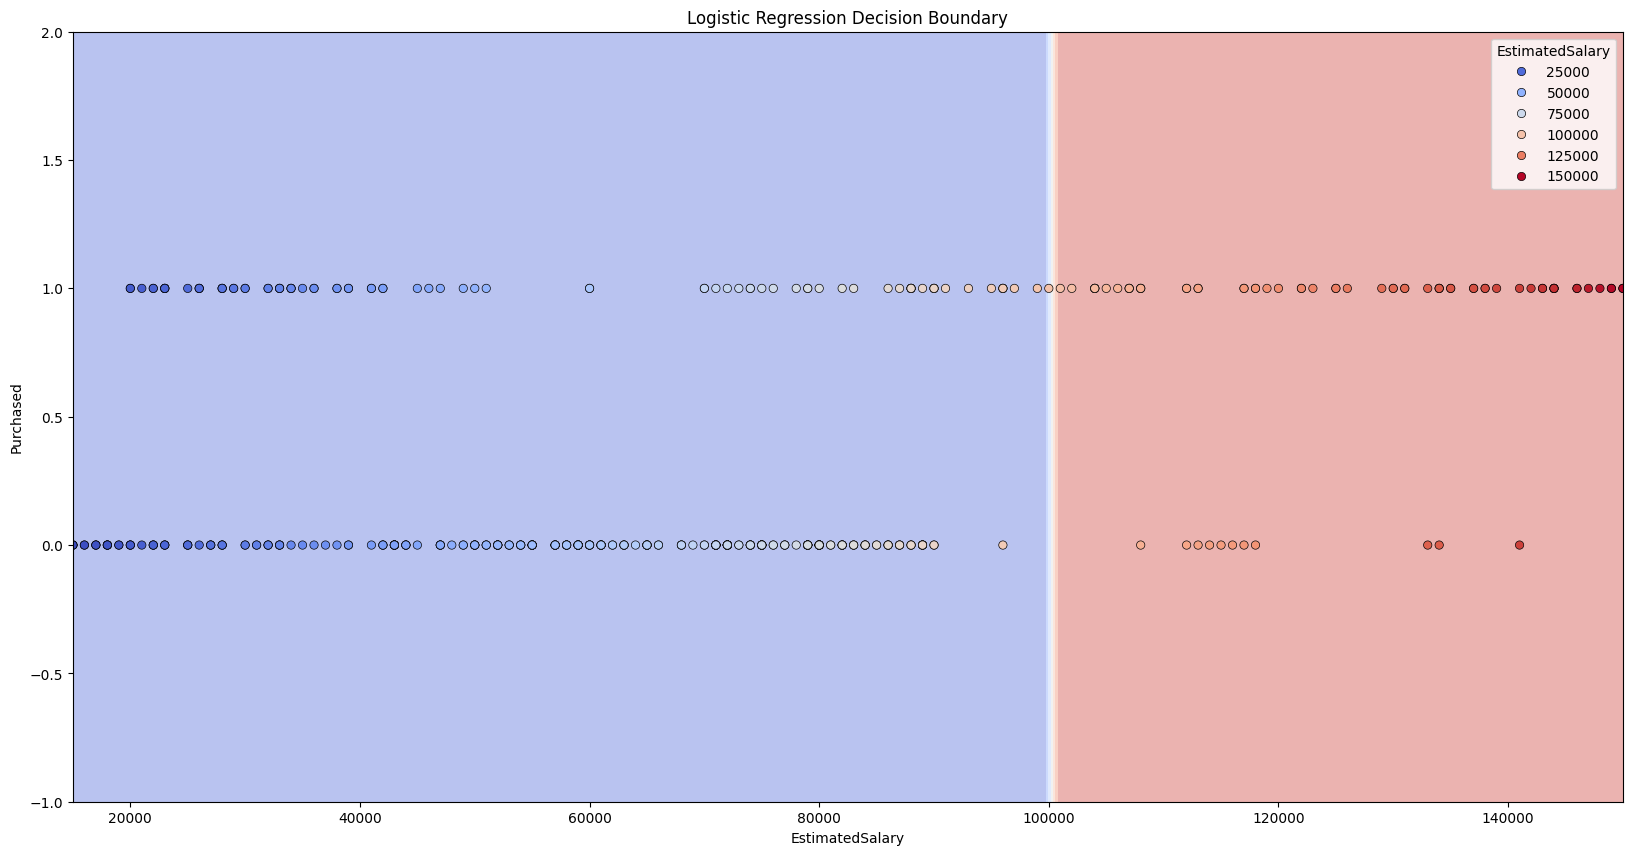

In [36]:
 #Create a mesh grid for plotting decision boundary
import numpy as np
x_min, x_max = raw_data["EstimatedSalary"].min() - 1, raw_data["EstimatedSalary"].max() + 1
y_min, y_max = raw_data["Purchased"].min() - 1, raw_data["Purchased"].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

predict_df = pd.DataFrame({
    "User ID": [raw_data["User ID"].mean()]*len(xx.ravel()),
    'Gender': [raw_data['Gender'].mode()[0]] * len(xx.ravel()),
    'Age': [raw_data['Age'].mean()] * len(xx.ravel()),
    "EstimatedSalary": xx.ravel(),
    })

# Predict across the grid
Z = model.predict(predict_df)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(20, 10))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")
sns.scatterplot(x=raw_data["EstimatedSalary"], y=raw_data["Purchased"], hue=raw_data["EstimatedSalary"], edgecolor="k", palette="coolwarm")
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# **Question 3 : Support Vector Machine (SVM)**

**3.1 Load Data**

In [37]:
import urllib.request
import pandas as pd
from pathlib import Path

def loadData():
  urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1yk2V26S-a55v7eav7lbYfm2TVhCVcceT", "rawData.csv")
  raw_data = pd.read_csv("rawData.csv")
  return raw_data

raw_data = loadData()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**3.2 Check Data**

In [38]:
print(f"No of Samples and Features present in dataset are {raw_data.shape}")

No of Samples and Features present in dataset are (5000, 14)


In [39]:
raw_data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

**3.3 Data Preprocessing and Scatter graph plotting**

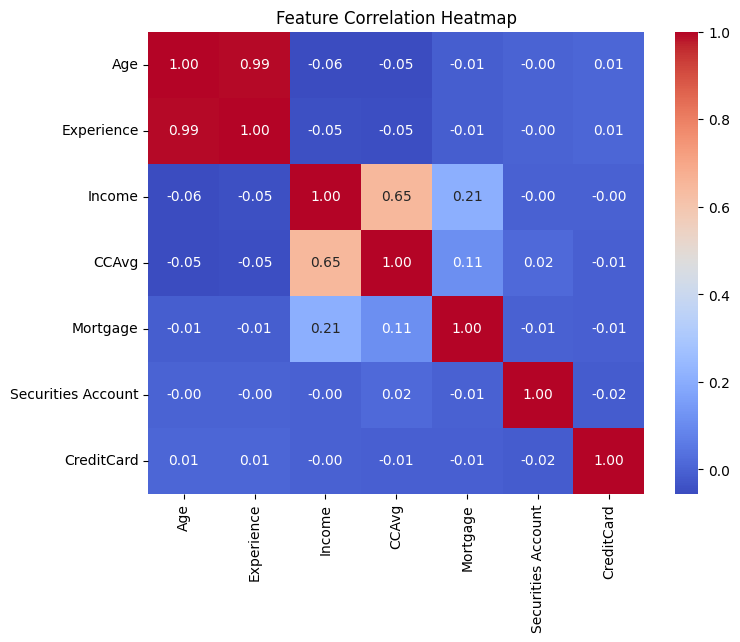

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = raw_data[['Age','Experience', 'Income', 'CCAvg', 'Mortgage', 'Securities Account','CreditCard']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [41]:
features = raw_data[['Age','Income','CCAvg','CreditCard']]

# if no of Non-null values is equals to number of samples then features has no Null value
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         5000 non-null   int64  
 1   Income      5000 non-null   int64  
 2   CCAvg       5000 non-null   float64
 3   CreditCard  5000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 156.4 KB
None


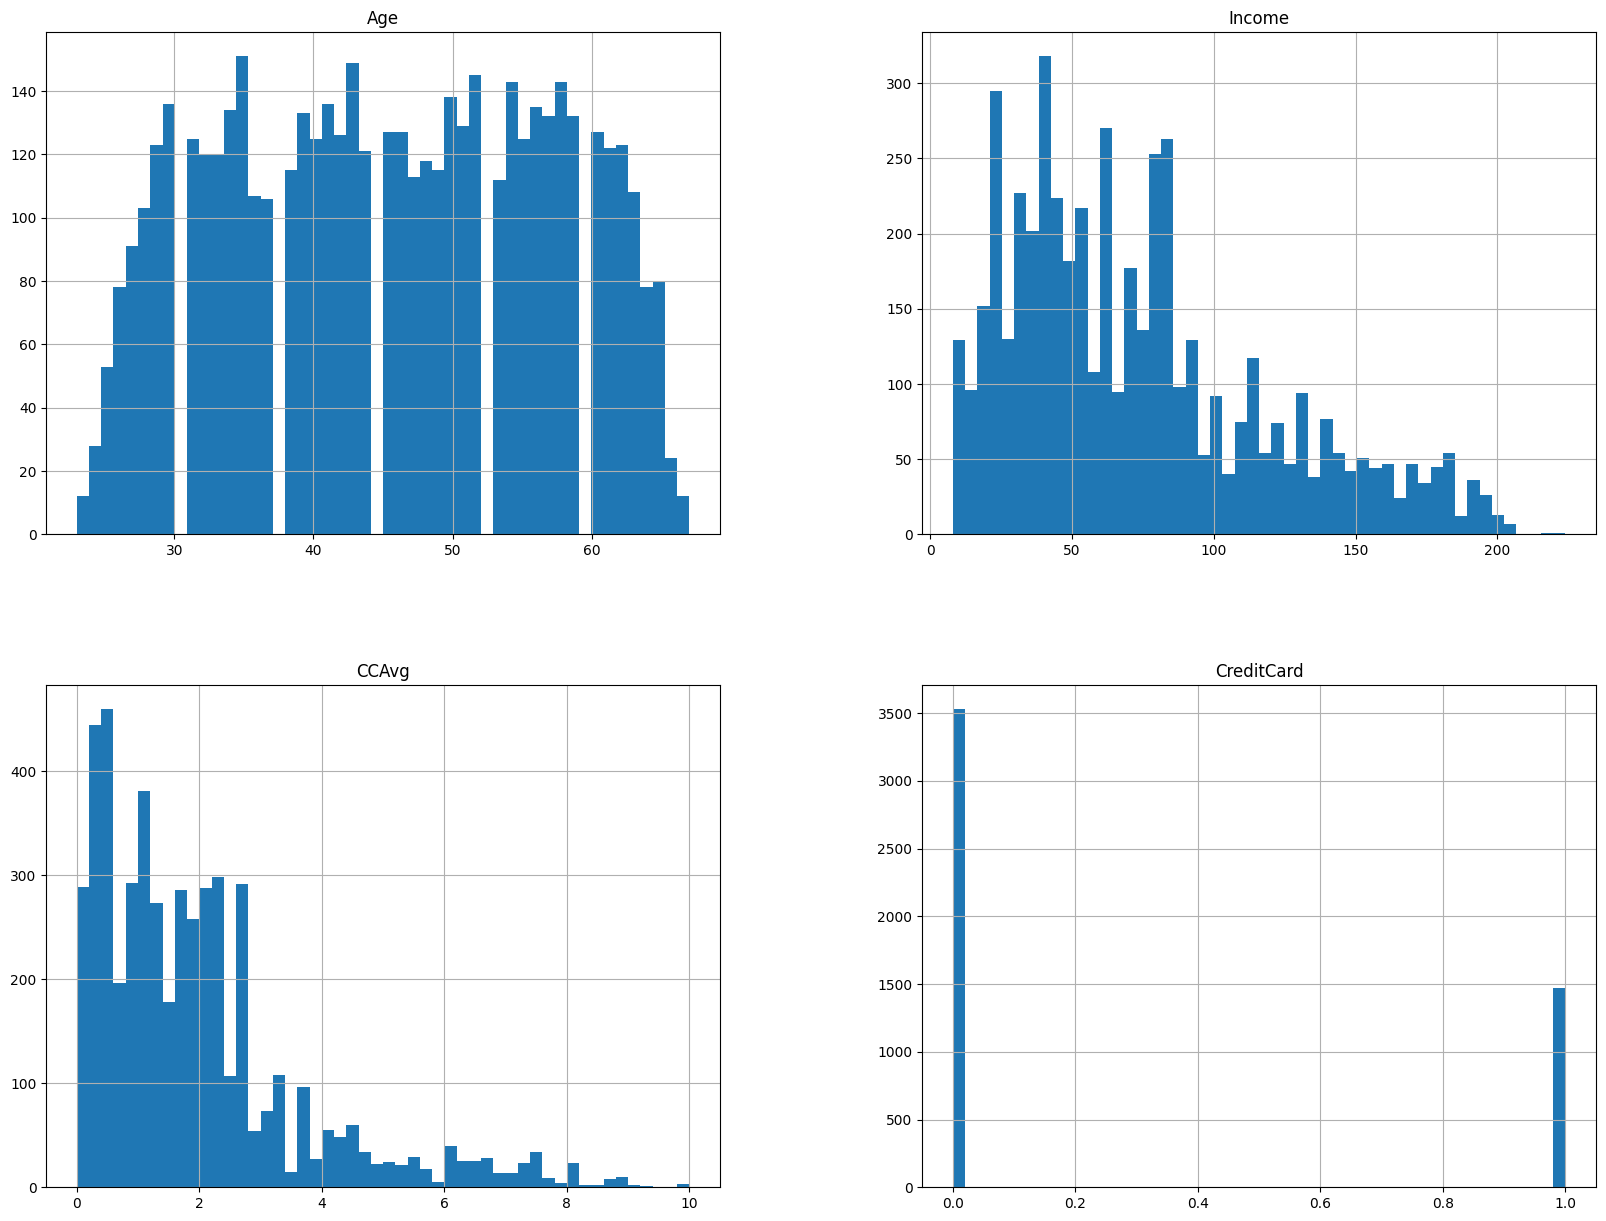

In [42]:
features.hist(bins=50, figsize=(20,15))
plt.show()

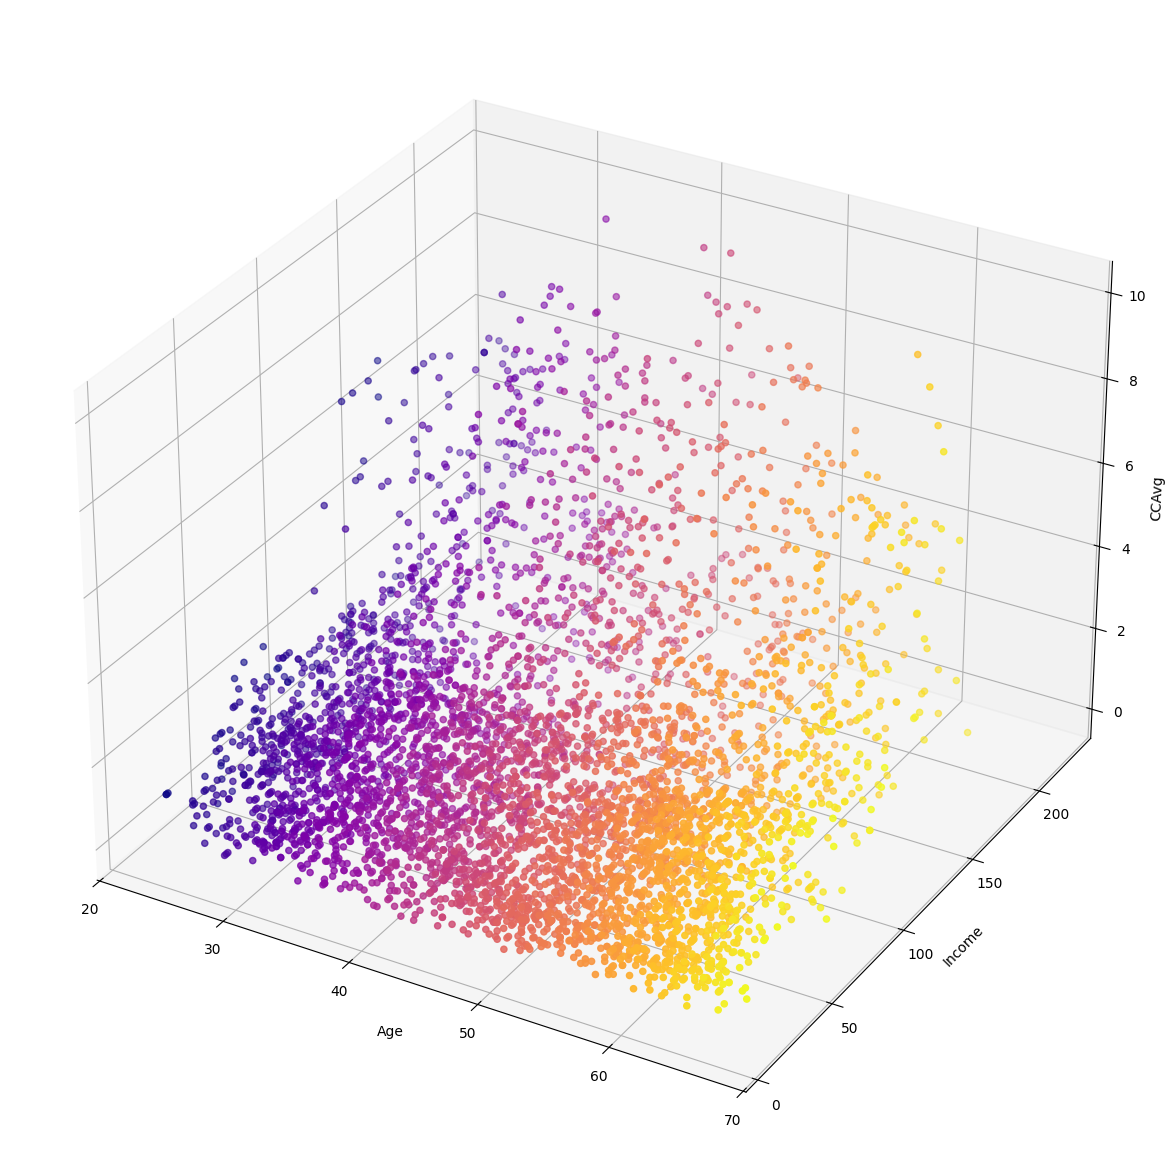

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features['Age'], features['Income'], features['CCAvg'], c=features['Age'],cmap='plasma', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('CCAvg')

plt.show()

**3.4 Data Spliting into Test and Train data set**

In [44]:
from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(raw_data[['Experience','Income','CCAvg','CreditCard']], test_size=0.2, random_state=42)
train_set, test_set = train_test_split(features, test_size=0.2, random_state=42)

inputFeature_trainSet = train_set.drop('CreditCard', axis='columns')
targetFeature_trainSet = train_set['CreditCard']

inputFeature_testSet = test_set.drop('CreditCard', axis='columns')
targetFeature_testSet = test_set['CreditCard']

print(inputFeature_trainSet)

      Age  Income  CCAvg
4227   32     111    3.8
4676   39      68    2.1
800    31     173    6.0
3671   50      18    0.4
4193   62      31    0.2
...   ...     ...    ...
4426   33     140    4.6
466    25      13    0.9
3092   43     113    0.4
3772   35     152    3.0
860    57      30    0.7

[4000 rows x 3 columns]


**Normalization of data**

In [45]:
from sklearn.preprocessing import StandardScaler
def zscrore_normalization(data, column_list = None):
  scaler = StandardScaler()

  if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data)
  # if no attribute list is provided the fetch the attribute list first and then apply normalization
  if column_list is None:
    column_list = data.select_dtypes(include=['number']).columns.tolist()

  data[column_list] = scaler.fit_transform(data[column_list])
  return data, scaler

inputFeature_trainSet, scaler = zscrore_normalization(inputFeature_trainSet)

inputFeature_testSet = pd.DataFrame(scaler.transform(inputFeature_testSet), columns=inputFeature_testSet.columns)

# inputFeature_testSet = zscrore_normalization(inputFeature_testSet)

print(inputFeature_trainSet)

           Age    Income     CCAvg
4227 -1.158067  0.805872  1.068332
4676 -0.546673 -0.128441  0.096520
800  -1.245409  2.153022  2.325971
3671  0.414088 -1.214852 -0.875293
4193  1.462191 -0.932385 -0.989624
...        ...       ...       ...
4426 -1.070725  1.435991  1.525655
466  -1.769460 -1.323493 -0.589466
3092 -0.197305  0.849329 -0.875293
3772 -0.896041  1.696729  0.611008
860   1.025482 -0.954113 -0.703796

[4000 rows x 3 columns]


**3.5 Train SVC Model**

In [46]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

model = None

for c in C:
  model = LinearSVC(C=c, max_iter=100000000, random_state=25, class_weight='balanced')
  model.fit(inputFeature_trainSet, targetFeature_trainSet)
  prediction = model.predict(inputFeature_testSet)
  accuracy = accuracy_score(targetFeature_testSet, prediction)
  conf_matrix = confusion_matrix(targetFeature_testSet, prediction)
  class_report = classification_report(targetFeature_testSet, prediction)

  print(f"For C={c}: \nAccuracy={accuracy:.4f}")
  print("\nConfusion Matrix:\n", conf_matrix)
  print("\nClassification Report:\n", class_report)
  print("========================================")

For C=0.0001: 
Accuracy=0.4560

Confusion Matrix:
 [[312 396]
 [148 144]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.44      0.53       708
           1       0.27      0.49      0.35       292

    accuracy                           0.46      1000
   macro avg       0.47      0.47      0.44      1000
weighted avg       0.56      0.46      0.48      1000

For C=0.001: 
Accuracy=0.4730

Confusion Matrix:
 [[332 376]
 [151 141]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56       708
           1       0.27      0.48      0.35       292

    accuracy                           0.47      1000
   macro avg       0.48      0.48      0.45      1000
weighted avg       0.57      0.47      0.50      1000

For C=0.01: 
Accuracy=0.4740

Confusion Matrix:
 [[333 375]
 [151 141]]

Classification Report:
               precision    recall  f1-score   suppor

**3.6 GridSearchCV for Hyper-parameter optimization**

In [51]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": C}
grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(inputFeature_trainSet, targetFeature_trainSet)
best_C = grid_search.best_params_['C']
print("\nBest regularization parameter : ", best_C)

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best regularization parameter :  0.01


**Analysis with different kernels**

1. Linear

In [47]:
# 1. linear

from sklearn.svm import SVC

for c in C:
  model = SVC(kernel="linear", C=c, random_state=25, class_weight='balanced')
  model.fit(inputFeature_trainSet, targetFeature_trainSet)
  prediction = model.predict(inputFeature_testSet)
  accuracy = accuracy_score(targetFeature_testSet, prediction)
  conf_matrix = confusion_matrix(targetFeature_testSet, prediction)
  class_report = classification_report(targetFeature_testSet, prediction, zero_division=1)

  print(f"For C={c}: \nAccuracy={accuracy:.4f}")
  print("\nConfusion Matrix:\n", conf_matrix)
  print("\nClassification Report:\n", class_report)
  print("========================================")

For C=0.0001: 
Accuracy=0.2920

Confusion Matrix:
 [[  0 708]
 [  0 292]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       708
           1       0.29      1.00      0.45       292

    accuracy                           0.29      1000
   macro avg       0.65      0.50      0.23      1000
weighted avg       0.79      0.29      0.13      1000

For C=0.001: 
Accuracy=0.7080

Confusion Matrix:
 [[708   0]
 [292   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       1.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.85      0.50      0.41      1000
weighted avg       0.79      0.71      0.59      1000

For C=0.01: 
Accuracy=0.3430

Confusion Matrix:
 [[ 82 626]
 [ 31 261]]

Classification Report:
               precision    recall  f1-score   suppor

2. RBF

In [48]:
# 2 RBF

for c in C:
  model = SVC(kernel="rbf", C=c, random_state=25, class_weight='balanced')
  model.fit(inputFeature_trainSet, targetFeature_trainSet)
  prediction = model.predict(inputFeature_testSet)
  accuracy = accuracy_score(targetFeature_testSet, prediction)
  conf_matrix = confusion_matrix(targetFeature_testSet, prediction)
  class_report = classification_report(targetFeature_testSet, prediction, zero_division=1)

  print(f"For C={c}: \nAccuracy={accuracy:.4f}")
  print("\nConfusion Matrix:\n", conf_matrix)
  print("\nClassification Report:\n", class_report)
  print("========================================")

For C=0.0001: 
Accuracy=0.2920

Confusion Matrix:
 [[  0 708]
 [  0 292]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       708
           1       0.29      1.00      0.45       292

    accuracy                           0.29      1000
   macro avg       0.65      0.50      0.23      1000
weighted avg       0.79      0.29      0.13      1000

For C=0.001: 
Accuracy=0.7080

Confusion Matrix:
 [[708   0]
 [292   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       1.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.85      0.50      0.41      1000
weighted avg       0.79      0.71      0.59      1000

For C=0.01: 
Accuracy=0.2920

Confusion Matrix:
 [[  0 708]
 [  0 292]]

Classification Report:
               precision    recall  f1-score   suppor

3. Poly

In [49]:
# 3 Poly

for c in C:
  model = SVC(kernel="poly", C=c, random_state=25, class_weight='balanced')
  model.fit(inputFeature_trainSet, targetFeature_trainSet)
  prediction = model.predict(inputFeature_testSet)
  accuracy = accuracy_score(targetFeature_testSet, prediction)
  conf_matrix = confusion_matrix(targetFeature_testSet, prediction)
  class_report = classification_report(targetFeature_testSet, prediction, zero_division=1)

  print(f"For C={c}: \nAccuracy={accuracy:.4f}")
  print("\nConfusion Matrix:\n", conf_matrix)
  print("\nClassification Report:\n", class_report)
  print("========================================")

For C=0.0001: 
Accuracy=0.2920

Confusion Matrix:
 [[  0 708]
 [  0 292]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       708
           1       0.29      1.00      0.45       292

    accuracy                           0.29      1000
   macro avg       0.65      0.50      0.23      1000
weighted avg       0.79      0.29      0.13      1000

For C=0.001: 
Accuracy=0.7080

Confusion Matrix:
 [[708   0]
 [292   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       1.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.85      0.50      0.41      1000
weighted avg       0.79      0.71      0.59      1000

For C=0.01: 
Accuracy=0.3130

Confusion Matrix:
 [[ 28 680]
 [  7 285]]

Classification Report:
               precision    recall  f1-score   suppor

4. Sigmoid

In [50]:
# 4 Sigmoid

for c in C:
  model = SVC(kernel="sigmoid", C=c, random_state=25, class_weight='balanced')
  model.fit(inputFeature_trainSet, targetFeature_trainSet)
  prediction = model.predict(inputFeature_testSet)
  accuracy = accuracy_score(targetFeature_testSet, prediction)
  conf_matrix = confusion_matrix(targetFeature_testSet, prediction)
  class_report = classification_report(targetFeature_testSet, prediction, zero_division=1)

  print(f"For C={c}: \nAccuracy={accuracy:.4f}")
  print("\nConfusion Matrix:\n", conf_matrix)
  print("\nClassification Report:\n", class_report)
  print("========================================")

For C=0.0001: 
Accuracy=0.2920

Confusion Matrix:
 [[  0 708]
 [  0 292]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       708
           1       0.29      1.00      0.45       292

    accuracy                           0.29      1000
   macro avg       0.65      0.50      0.23      1000
weighted avg       0.79      0.29      0.13      1000

For C=0.001: 
Accuracy=0.7080

Confusion Matrix:
 [[708   0]
 [292   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       1.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.85      0.50      0.41      1000
weighted avg       0.79      0.71      0.59      1000

For C=0.01: 
Accuracy=0.2920

Confusion Matrix:
 [[  0 708]
 [  0 292]]

Classification Report:
               precision    recall  f1-score   suppor

# **Question 4. Decision Tree and Random Forest**

**4.0 Data Loading and analysis**

In [52]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

features = iris.data
target = iris.target

raw_data = pd.DataFrame(features, columns = iris.feature_names)
raw_data['species'] = target

print(raw_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

In [53]:
print(raw_data.info())

raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

**3.1 Dataset distribution, relation and classification visualization**

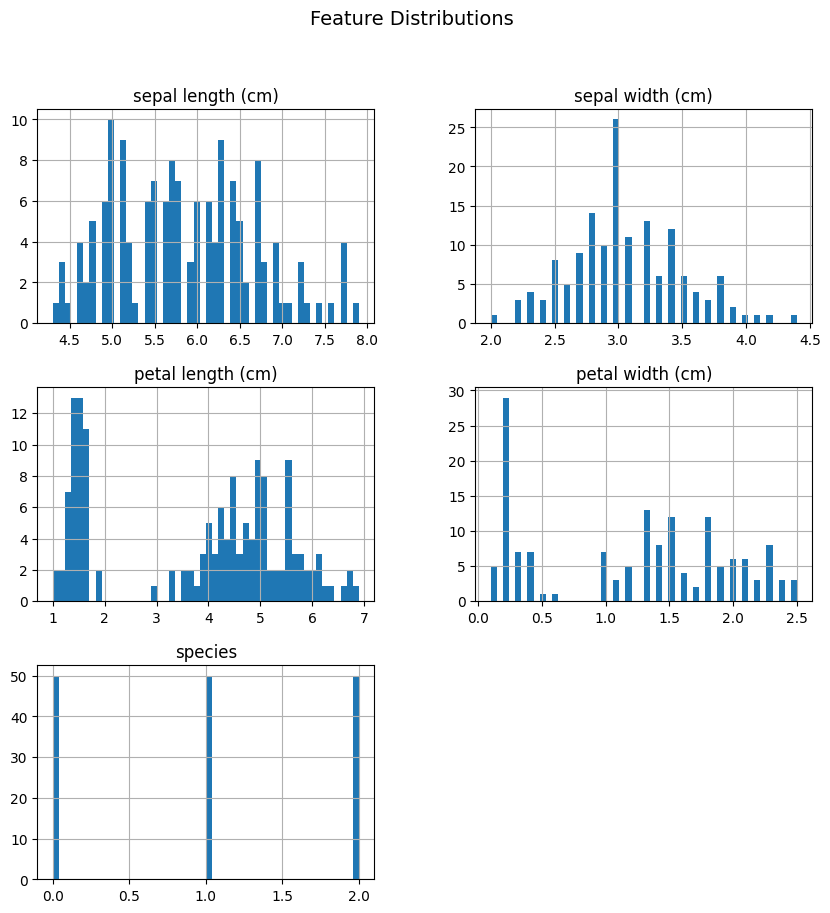

In [54]:
import matplotlib.pyplot as plt

# Feature Distributions
raw_data.hist(bins = 50, figsize = (10, 10))
plt.suptitle('Feature Distributions', fontsize=14)
plt.show()

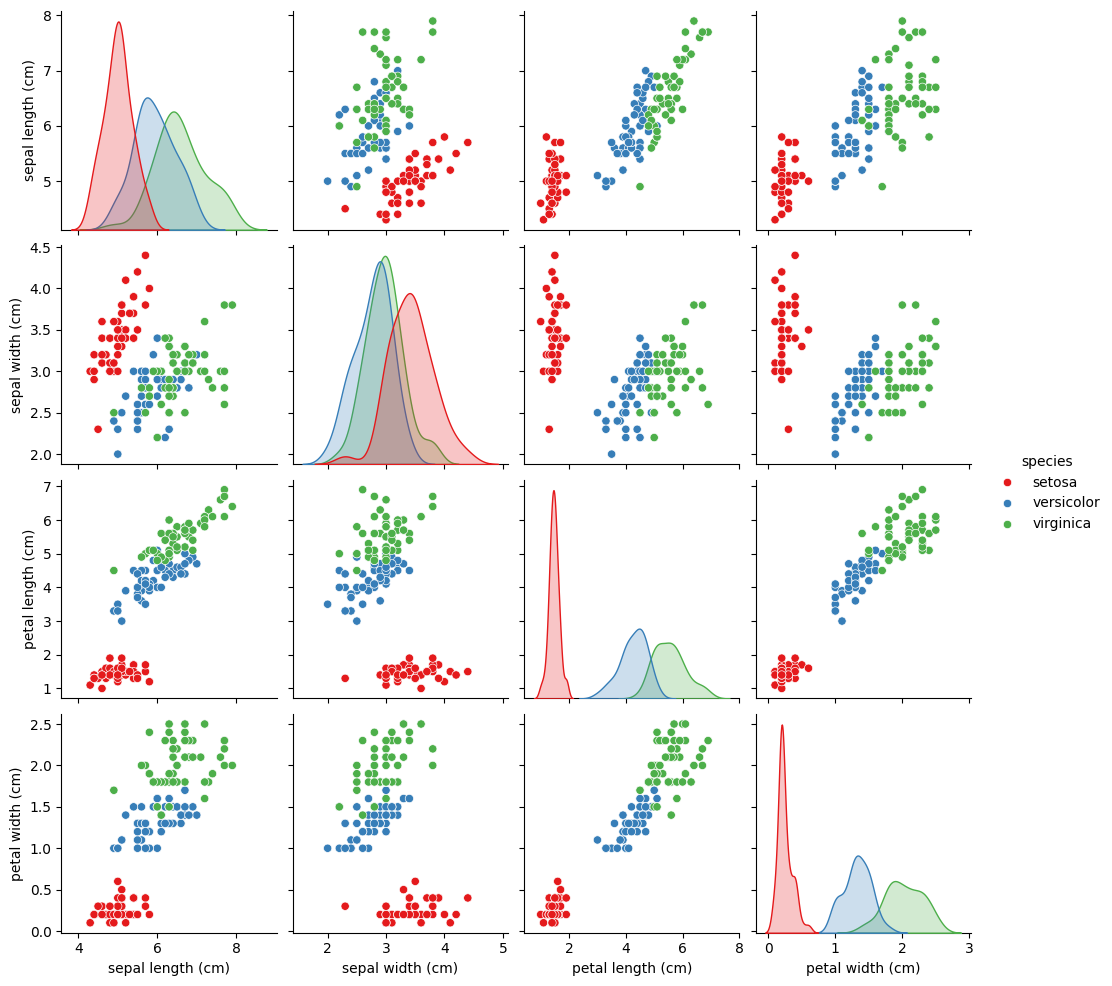

In [55]:
import seaborn as sns

# Pairwise Distributions
raw_data['species'] = raw_data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
sns.pairplot(raw_data, hue='species', diag_kind='kde', palette='Set1')
plt.show()

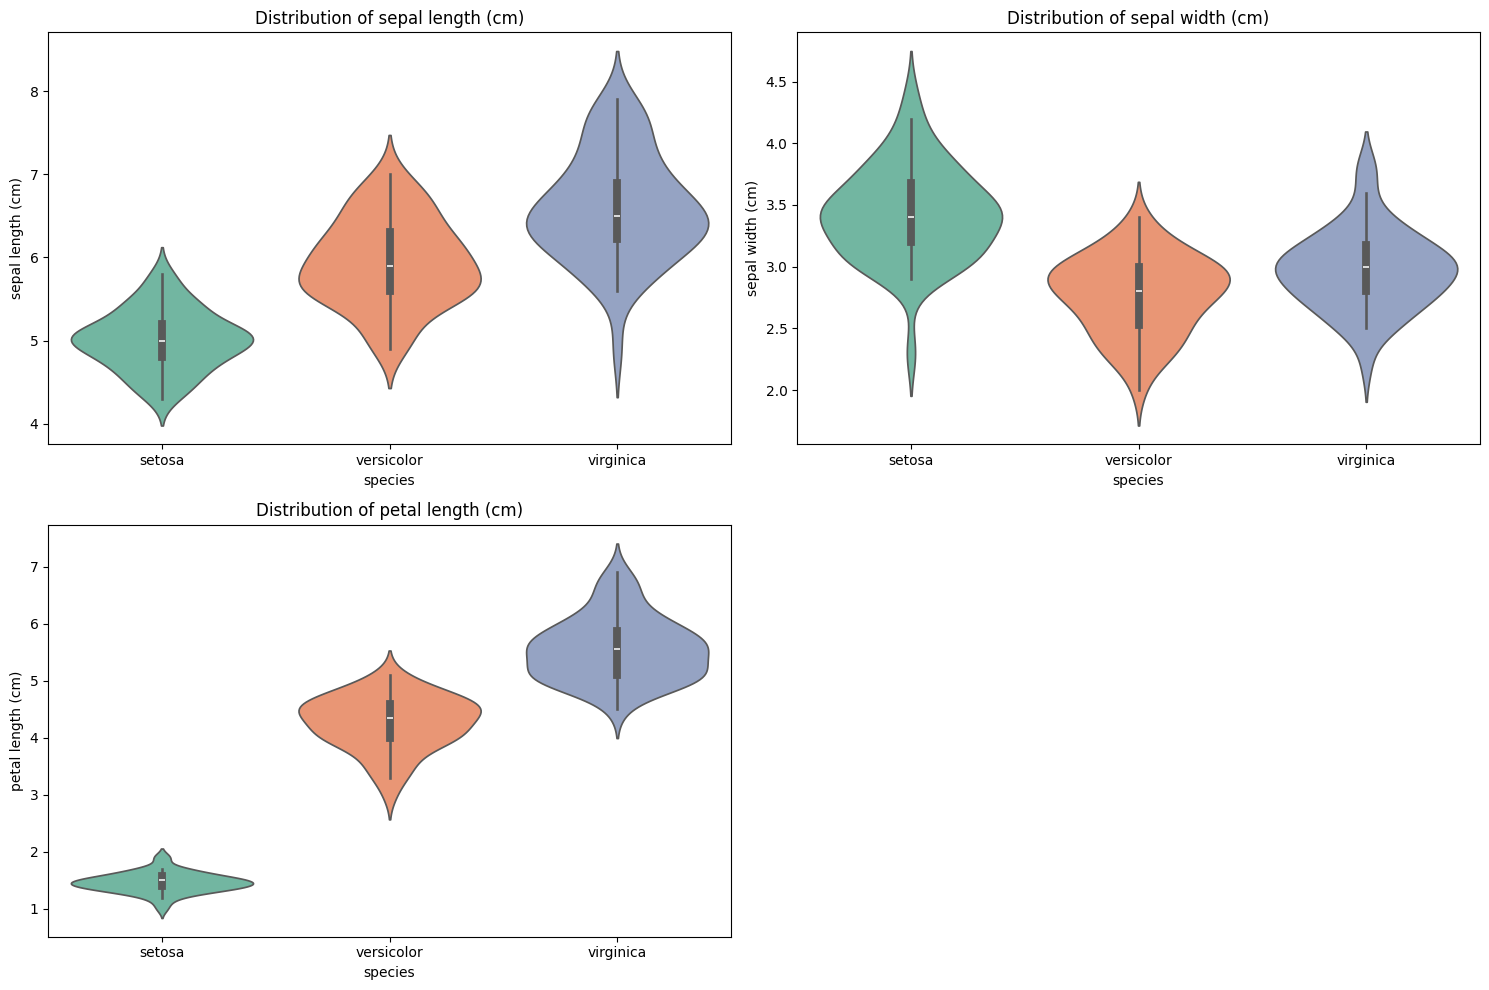

In [56]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(raw_data.columns[:-2]):  # Exclude 'species' and 'species_name'
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=column, data=raw_data, hue='species', palette='Set2', dodge=False)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

**3.2 Encoding**

In [57]:
# encoding species
raw_data['species'] = raw_data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

**3.3 Data split : Test and Train set**

In [58]:
from sklearn.model_selection import train_test_split

inputFeature = raw_data.drop('species', axis=1)
target = raw_data['species']

# using 80:20 train to test ratio
x_train, x_test, y_train, y_test = train_test_split(inputFeature, target, test_size=0.2, random_state=30)

**4.3 Decision Tree**

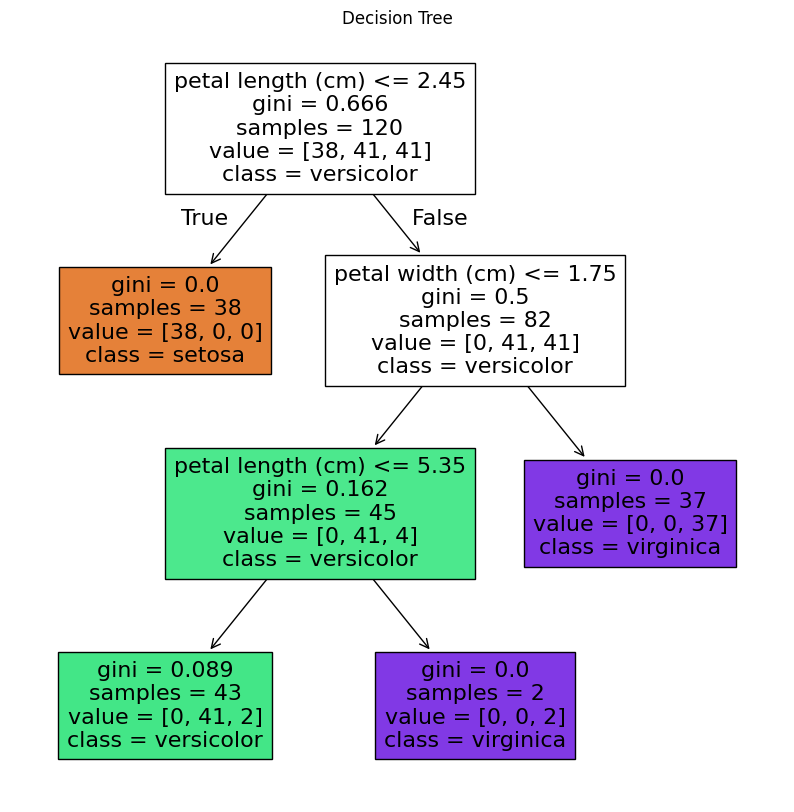

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifierTree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=40)
classifierTree.fit(x_train, y_train)

plt.figure(figsize=(10,10))
plot_tree(classifierTree, filled=True, feature_names=iris.feature_names, class_names = iris.target_names)
plt.title('Decision Tree')
plt.show()


In [60]:
from sklearn.metrics import accuracy_score

prediction = classifierTree.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


Text(0.5, 1.0, 'Confusion Matrix')

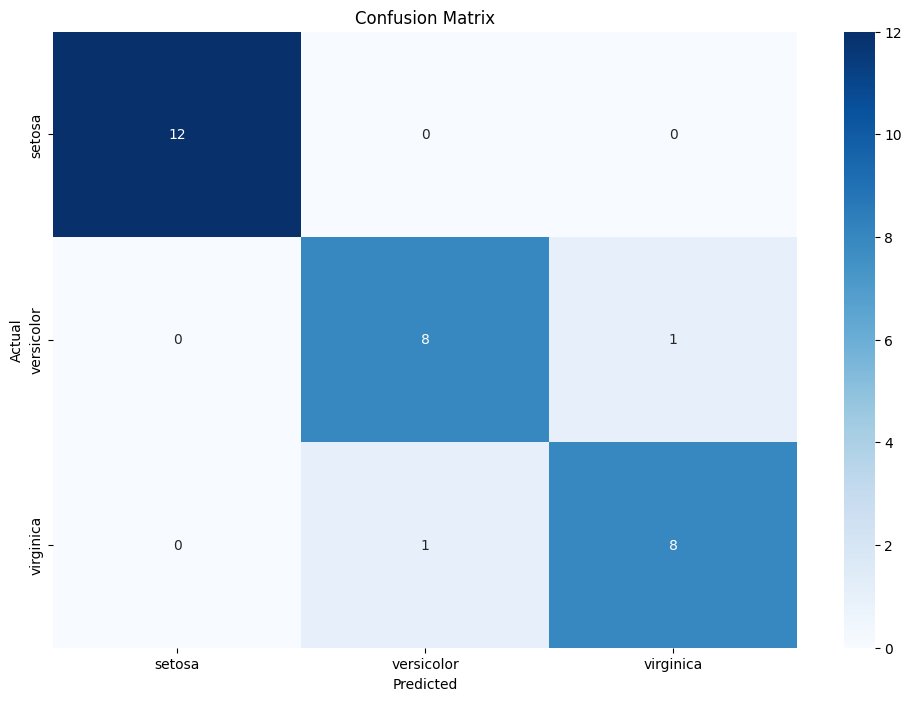

In [61]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

dt_confusion_matrix = confusion_matrix(y_test, prediction)

plt.figure(figsize=(12,8))
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

**4.5 Random Forset**

In [62]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, prediction, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      0.89      0.89         9
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [63]:
# RandomForest building and making predictions
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=200, max_depth = 2, min_samples_split=2, random_state=42)
rf_classifier.fit(x_train, y_train)

prediction = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


Getting the best hyperparameters using GridSearchCV and training the RandomForest with best hyperparameters

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train model with best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(x_train, y_train)

prediction = best_rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.2f}")


Best parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.93


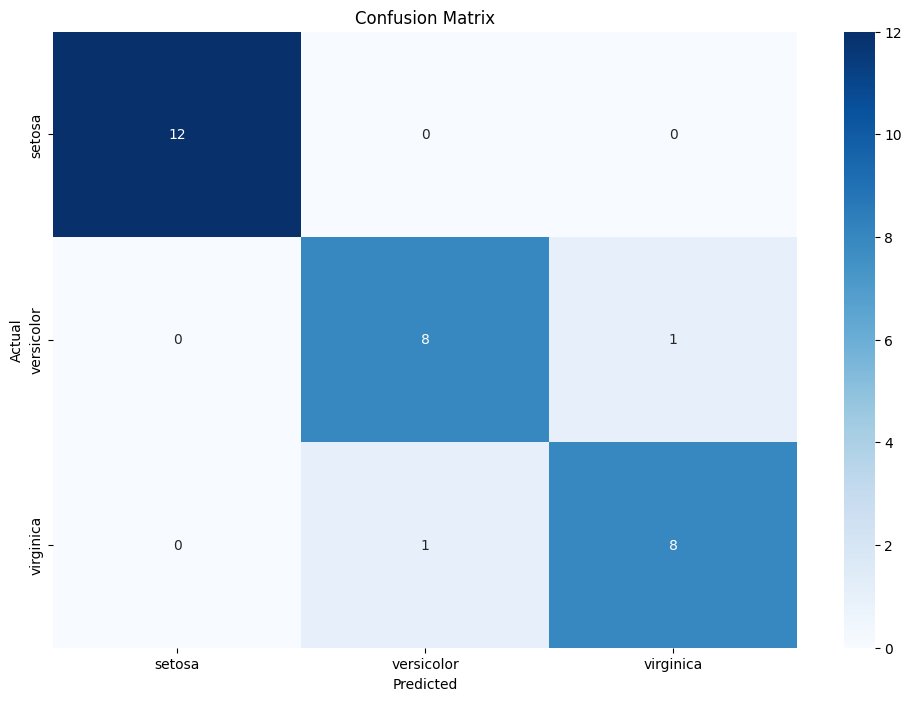

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

rf_confusion_matrix = confusion_matrix(y_test,prediction)

plt.figure(figsize=(12,8))
sns.heatmap(rf_confusion_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()